# Low Noise : ChatGPT + NLTK + Vader

In [1]:
import numpy as np
import pandas as pd
import config
import jupyter_service
import sys
import matplotlib.pyplot as plt
from dbcontext import Context
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.display.float_format = '{:.2f}'.format
print(sys.version, np.__version__, pd.__version__, config.version)
context = Context()
context.create(echo=False)
service = jupyter_service.JupyterService(context)
nb_form=15854
pd.set_option('max_colwidth', 1000)
print(config.connection_string)

3.11.3 (tags/v3.11.3:f3909b8, Apr  4 2023, 23:49:59) [MSC v.1934 64 bit (AMD64)] 2.0.2 2.2.3 0.1.0.Beta
postgresql://postgres:sa@localhost:5432/yt1


In [2]:
question_nb=12
mode="gpt-4o-mini"

Stats

In [3]:
df = service.get_stats(mode)
avg=float(df.iloc[0].average)
median=float(df.iloc[0].median_)
percentile=float(df.iloc[0].percentile)
df

,average,median_,quartile,decile,percentile
0,26.64,4.00,2.00,2.00,2.00


Low Noise


In [37]:
empathy_category="pd"
df = service.get_scores(mode, question_nb, empathy_category, positive=False, denominator_thresold=0, numerator_thresold=5, sentiment=False,gpt_comment=True)
df=df[df.score > 6] 
print(f"Low noise {empathy_category} negative score")
df.to_csv(f"out/chatgpt_low_{empathy_category}0.csv", index=False)
df.head(10)

Low noise pd negative score


,id,topic,nb_negative_form,nb_positive_form,score,explaination
0,30941,experience,9,1,9.00,"Negative terms related to personal distress include anxiety, frustration, burnout, isolation, dissatisfaction, helplessness, and emotional pain."
1,31056,housing,9,1,9.00,"Negative terms include poverty, homelessness, insecurity, inequality, distress, inadequate housing, financial burden, fear, and instability."
2,31112,economic,19,3,6.33,"Negative terms related to personal distress and economic issues include inequality, exploitation, poverty, instability, injustice, and lack of access."


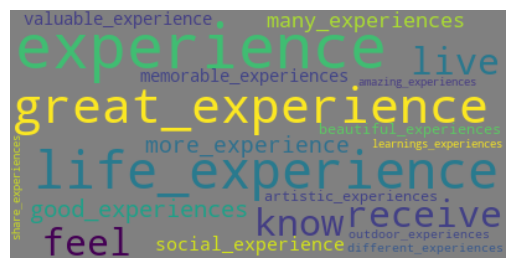

In [38]:
for i in range(len(df)-1,-1,-1):
    topic1 = df.topic[i]
    if topic1 is not None:
        df_lema1 = service.get_lemas(topic1, "gpt-4o-mini")
        df_lema3 = service.get_lemas(topic1, "textrank")
    df_lema = pd.concat([df_lema1, df_lema3], ignore_index=True)
    df_lema.to_csv(f"out/lemas/lemas_gpt_{df.topic[i].replace(' ','_')}.csv", index=False)
service.show_lemas(df_lema)

In [45]:
df = service.get_scores(mode, question_nb, empathy_category, positive=True, denominator_thresold=0, numerator_thresold=5, sentiment=False, gpt_comment=True)
df=df[(df.score > 6) & (df.nb_positive_form < 50)] 
print(f"Low noise {empathy_category} positive score")
df.to_csv(f"out/chatgpt_low_{empathy_category}2.csv", index=False)
df.head(10)

Low noise pd positive score


,id,topic,nb_positive_form,nb_negative_form,score,explaination
0,31947,becomebetter,42,NaN,420.00,"Personal distress can lead to growth, empathy, resilience, self-awareness, and improved relationships, fostering overall well-being and strength."
1,31948,numerous,42,NaN,420.00,"Resilience, growth, support, empathy, self-awareness, healing, empowerment, compassion, adaptation, transformation, connection, perseverance."
2,30882,billionaire,9,NaN,90.00,"Aspiring billionaires seek to create positive change, support communities, invest in sustainability, and foster professional success and happiness."
3,30981,secure,7,NaN,70.00,"Positive terms: happiness, security, freedom, peace, independence, acceptance, health, sustainability, financial stability, joy, success, community."
4,30946,succes,6,NaN,60.00,"Personal distress can lead to growth, while success brings happiness, peace, stability, equality, and opportunities for all."
5,31008,wellness,10,1.00,10.00,"Health, happiness, peace, wellness, success, stability, sustainability, love, kindness, fulfillment, community, equality, growth, and harmony."
6,31386,need,7,1.00,7.00,"Empathy, support, community, sustainability, happiness, equality, love, connection, fulfillment, and environmental stewardship enhance personal growth and well-being."
7,32440,cohesion,7,1.00,7.00,"Personal distress can foster empathy, while cohesion promotes unity, understanding, and collective growth towards a peaceful and inclusive society."


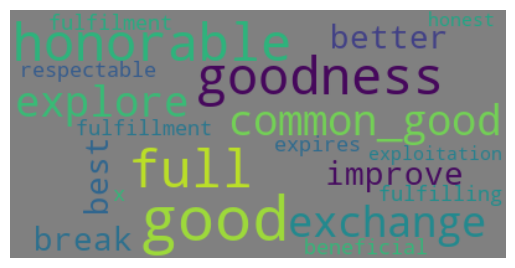

In [40]:
for i in range(len(df)-1,-1,-1):
    topic1 = df.topic[i]
    if topic1 is not None:
        df_lema1 = service.get_lemas(topic1, "gpt-4o-mini")
        df_lema3 = service.get_lemas(topic1, "textrank")
    df_lema = pd.concat([df_lema1, df_lema3], ignore_index=True)
    df_lema.to_csv(f"out/lemas/lemas_gpt_{df.topic[i].replace(' ','_')}.csv", index=False)
service.show_lemas(df_lema)

In [26]:
topic = "independence"
df = service.get_gpt_comment(topic, question_nb, "ec", True)
print(df.iloc[0]["explaination"])

Empathic concern fosters compassion for others, while independence promotes self-reliance and personal development, leading to a harmonious society.
